**Names:** Tia Abraham, Bram Schork, and Jacob Alderete

# Imports

In [48]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Problem 1

## Part (a)

### Load in Fama French Portfolio Data

In [2]:
# Read the file, skipping header text rows and limiting to monthly data
ff = pd.read_csv("F-F_Research_Data_Factors 3.CSV", skiprows=3, nrows=1182)

# Rename the date column for clarity
ff.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

# Convert Date to string to extract Year and Month
ff['Date'] = ff['Date'].astype(str)
ff['Year'] = ff['Date'].str[:4].astype(int)
ff['Month'] = ff['Date'].str[4:].astype(int)

# Convert other values to floats
ff['Mkt-RF'] = ff['Mkt-RF'].astype(float)
ff['RF'] = ff['RF'].astype(float)

# Pull the columns we want
ff = ff[['Year', 'Month', 'Mkt-RF', 'RF']]

# Show the updated DataFrame
print(ff.head())


   Year  Month  Mkt-RF    RF
0  1926      7    2.96  0.22
1  1926      8    2.64  0.25
2  1926      9    0.36  0.23
3  1926     10   -3.24  0.32
4  1926     11    2.53  0.31


### Calculate Market Portfolio Statistics

In [3]:
# Compute market return
ff["Mkt"] = ff["Mkt-RF"] + ff["RF"]

# Compute average monthly return, volatility, and Sharpe ratio
mp_avg_return = ff["Mkt"].mean()
mp_volatility = ff["Mkt"].std()
mp_avg_excess_return = ff["Mkt-RF"].mean()
mp_sharpe_ratio = mp_avg_excess_return / mp_volatility

print(f"MP Average Monthly Return: {mp_avg_return:.4f}")
print(f"MP Volatility: {mp_volatility:.4f}")
print(f"MP Sharpe Ratio: {mp_sharpe_ratio:.4f}")

MP Average Monthly Return: 0.9557
MP Volatility: 5.3169
MP Sharpe Ratio: 0.1291


## Part (b)

### Load in Strategies Dataset

In [13]:
# Read the file
ss = pd.read_csv("ps1_strategies.csv")

# Convert Date to string to extract Year and Month
ss['date'] = ss['date'].astype(str)
ss['Year'] = ss['date'].str[:4].astype(int)
ss['Month'] = ss['date'].str[4:].astype(int)

# Make other values floats
ss['CA'] = ss['CA'].astype(float)
ss['LBHA'] = ss['LBHA'].astype(float)
ss['LSA'] = ss['LSA'].astype(float)
ss['TA'] = ss['TA'].astype(float)
ss['HV'] = ss['HV'].astype(float)
ss['LV'] = ss['LV'].astype(float)
ss['NA'] = ss['NA'].astype(float)
ss['LB'] = ss['LB'].astype(float)
ss['HB'] = ss['HB'].astype(float)

# Pull the columns we want
ss = ss[['Year', 'Month', 'CA', 'LBHA', 'LSA', 'TA', 'HV', 'LV', 'NA', 'LB', 
         'HB']]

# Show the updated DataFrame
print(ss.head())

   Year  Month        CA      LBHA     LSA        TA        HV        LV  \
0  1990      1 -1.771984  1.498262 -7.4575  1.679061 -7.271919  0.022091   
1  1990      2  1.418966  3.642659  1.0545  0.205289 -0.986167  0.062055   
2  1990      3  1.375007  1.737180  1.7385 -1.572688 -0.018665  0.341639   
3  1990      4 -0.395588  0.734520 -3.1920  2.474704 -3.294381  0.253568   
4  1990      5  2.588010  1.298923  7.9990  0.754379  8.038877 -0.113650   

         NA        LB         HB  
0 -5.392944 -1.353457 -22.772632  
1 -1.768405 -2.118514   5.151408  
2 -0.333926  1.452434   4.480134  
3 -2.578905  2.123740 -10.101798  
4  1.337511 -1.555230  26.259080  


### Merge the Datasets on Date

In [14]:
# Merge on Year and Month
merged = pd.merge(ss, ff, on=['Year', 'Month'], how='inner')

# Check merged result
print(merged.head())

   Year  Month        CA      LBHA     LSA        TA        HV        LV  \
0  1990      1 -1.771984  1.498262 -7.4575  1.679061 -7.271919  0.022091   
1  1990      2  1.418966  3.642659  1.0545  0.205289 -0.986167  0.062055   
2  1990      3  1.375007  1.737180  1.7385 -1.572688 -0.018665  0.341639   
3  1990      4 -0.395588  0.734520 -3.1920  2.474704 -3.294381  0.253568   
4  1990      5  2.588010  1.298923  7.9990  0.754379  8.038877 -0.113650   

         NA        LB         HB  Mkt-RF    RF   Mkt  
0 -5.392944 -1.353457 -22.772632   -7.85  0.57 -7.28  
1 -1.768405 -2.118514   5.151408    1.11  0.57  1.68  
2 -0.333926  1.452434   4.480134    1.83  0.64  2.47  
3 -2.578905  2.123740 -10.101798   -3.36  0.69 -2.67  
4  1.337511 -1.555230  26.259080    8.42  0.68  9.10  


### Calculate Constant Alpha Statistics

In [15]:
# First, find total returns from strategy
merged['CA_TR'] = merged["CA"] + merged["RF"]

# Then, compute average monthly return, volatility, and Sharpe ratio
ca_avg_return = merged['CA_TR'].mean()
ca_volatility = merged['CA_TR'].std()
ca_avg_excess_return = merged["CA"].mean()
ca_sharpe_ratio = ca_avg_excess_return / ca_volatility

print(f"CA Average Monthly Return: {ca_avg_return:.4f}")
print(f"CA Volatility: {ca_volatility:.4f}")
print(f"CA Sharpe Ratio: {ca_sharpe_ratio:.4f}")

CA Average Monthly Return: 0.9425
CA Volatility: 2.6183
CA Sharpe Ratio: 0.2803


## Part (c)

In [16]:
def estimate_capm(y):
    """
    Estimates CAPM alpha and beta for a given portfolio.

    Parameters:
        y : [pd.Series] The excess returns of the asset or strategy (i.e., 
                        asset return minus risk-free rate).

    Returns:
        dict: Contains alpha, beta, and regression summary.
    """
    # Set up regression: Excess_Portfolio ~ Market Excess Return (Mkt-RF)
    X = merged['Mkt-RF']

    X = sm.add_constant(X)  # Add intercept for alpha
    model = sm.OLS(y, X).fit()

    alpha = model.params['const']
    beta = model.params['Mkt-RF']

    return {
        'alpha': alpha,
        'beta': beta,
        'summary': model.summary(),
    }

## Part (d)

In [17]:
results = estimate_capm(merged['CA'])
print(f"Alpha: {results['alpha']:.4f}")
print(f"Beta: {results['beta']:.4f}")
print(results['summary'])

Alpha: 0.3980
Beta: 0.4887
                            OLS Regression Results                            
Dep. Variable:                     CA   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     866.8
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          1.17e-101
Time:                        22:47:29   Log-Likelihood:                -716.07
No. Observations:                 397   AIC:                             1436.
Df Residuals:                     395   BIC:                             1444.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3980    

## Part (e)

In [18]:
# Calculate CAPM-implied return for each time period
merged['CA_TR_hat'] = merged['RF'] + results['beta'] * merged['Mkt-RF']
print(merged.head())

   Year  Month        CA      LBHA     LSA        TA        HV        LV  \
0  1990      1 -1.771984  1.498262 -7.4575  1.679061 -7.271919  0.022091   
1  1990      2  1.418966  3.642659  1.0545  0.205289 -0.986167  0.062055   
2  1990      3  1.375007  1.737180  1.7385 -1.572688 -0.018665  0.341639   
3  1990      4 -0.395588  0.734520 -3.1920  2.474704 -3.294381  0.253568   
4  1990      5  2.588010  1.298923  7.9990  0.754379  8.038877 -0.113650   

         NA        LB         HB  Mkt-RF    RF   Mkt     CA_TR  CA_TR_hat  
0 -5.392944 -1.353457 -22.772632   -7.85  0.57 -7.28 -1.201984  -3.266388  
1 -1.768405 -2.118514   5.151408    1.11  0.57  1.68  1.988966   1.112470  
2 -0.333926  1.452434   4.480134    1.83  0.64  2.47  2.015007   1.534343  
3 -2.578905  2.123740 -10.101798   -3.36  0.69 -2.67  0.294412  -0.952072  
4  1.337511 -1.555230  26.259080    8.42  0.68  9.10  3.268010   4.794954  


## Part (f)

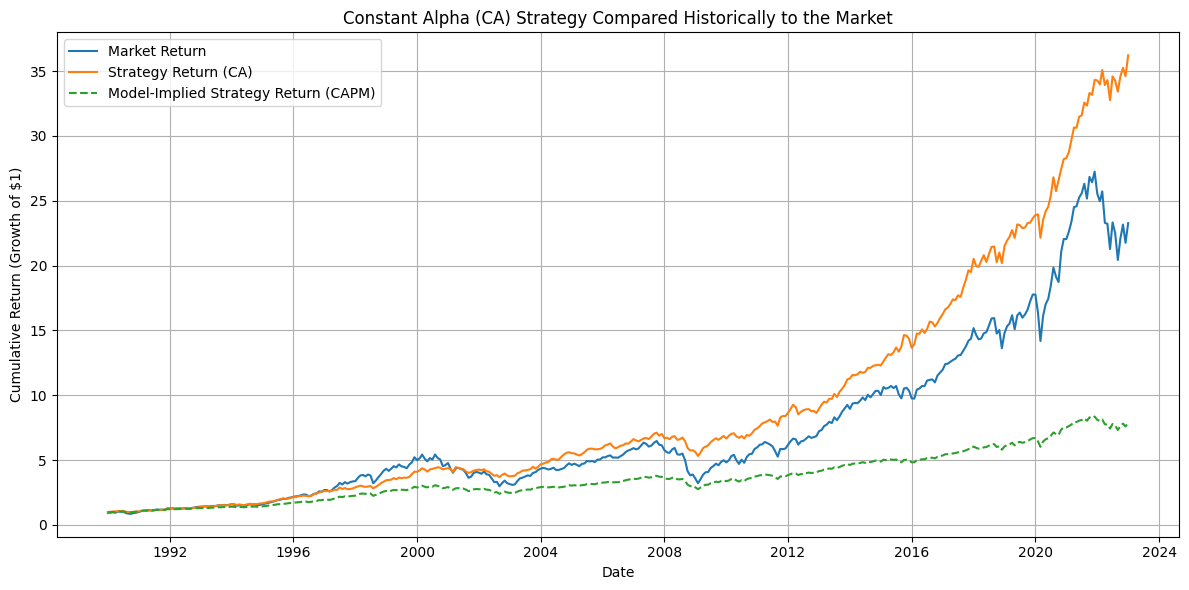

In [ ]:
# Compute cumulative returns
# "If I invested $1 at the start and reinvested returns each month, how much 
# money would I have at each time point?"
# Convert from percentage returns to decimal returns
merged['Mkt_cum'] = (1 + merged['Mkt'] / 100).cumprod()
merged['TR_cum'] = (1 + merged['CA_TR'] / 100).cumprod()
merged['RP_hat_cum'] = (1 + merged['CA_TR_hat'] / 100).cumprod()

# Create time axis from Year and Month
merged['Date'] = pd.to_datetime(merged['Year'].astype(str) + 
                                 merged['Month'].astype(str).str.zfill(2), 
                                 format='%Y%m')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged['Date'], merged['Mkt_cum'], label='Market Return')
plt.plot(merged['Date'], merged['TR_cum'], label='Strategy Return (CA)')
plt.plot(merged['Date'], merged['RP_hat_cum'], 
         label='Model-Implied Strategy Return (CAPM)', linestyle='--')

plt.title('Cumulative Returns: Market vs CA vs CAPM-Implied')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Growth of $1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Part (g)

Based on both the statistical analysis and the cumulative return plot, the CA strategy appears to be a compelling hedge fund candidate. While its average monthly return is similar to that of the market (0.9425% vs. 0.9557%), it achieves this performance with much lower volatility (2.62% vs. 5.32%), resulting in a significantly higher Sharpe ratio (0.2803 vs. 0.1291). This means the CA strategy delivers more return per unit of risk, a highly desirable trait in hedge fund management.

The regression results also highlight a relatively low beta of 0.4887, indicating that CA is less sensitive to market movements. Even more importantly, the strategy delivers a statistically significant alpha of 0.3980 (p-value of 0.000 < 0.05), suggesting it captures returns that the CAPM does not explain.

These findings are visually reinforced in the cumulative return plot. Over time, the CA strategy outpaces both the market and the model-implied returns by a wide margin, especially from around 2012 onward. This divergence shows that the strategy is not only consistent but also resilient, recovering quickly from drawdowns and compounding returns at a higher rate. In contrast, the CAPM-implied return grows much more slowly, underlining that the CA strategy’s performance cannot be fully explained by exposure to market risk alone.

In sum, the CA strategy’s strong risk-adjusted performance, positive alpha, and visual dominance in long-term growth **make it a good hedge fund strategy**.

# Problem 2

In [20]:
def analyze_strategy(strategy_name):
    """
    Analyze a strategy's performance using CAPM metrics and cumulative returns.

    Parameters:
    -----------
    strategy_name : str
        The name of the strategy column in the 'merged' DataFrame (e.g., "CA", 
        "LBHA").

    Returns:
    --------
    None. Prints results and plots cumulative returns.
    """
    # Calculate total return by adding back RF
    merged[f'{strategy_name}_TR'] = merged[strategy_name] + merged['RF']

    # Basic stats
    avg_return = merged[f'{strategy_name}_TR'].mean()
    volatility = merged[f'{strategy_name}_TR'].std()
    excess_mean = merged[strategy_name].mean()
    sharpe_ratio = excess_mean / volatility

    print(f"{strategy_name} Average Monthly Return: {avg_return:.4f}")
    print(f"{strategy_name} Volatility: {volatility:.4f}")
    print(f"{strategy_name} Sharpe Ratio: {sharpe_ratio:.4f}")

    # Run CAPM regression
    X = sm.add_constant(merged['Mkt-RF'])
    y = merged[strategy_name]
    model = sm.OLS(y, X).fit()

    alpha = model.params['const']
    beta = model.params['Mkt-RF']

    print(f"{strategy_name} Alpha: {alpha:.4f}")
    print(f"{strategy_name} Beta: {beta:.4f}")
    print(model.summary())

    # CAPM implied return
    merged[f'{strategy_name}_TR_hat'] = merged['RF'] + beta * merged['Mkt-RF']

    # Cumulative return calculations (convert % to decimals)
    merged['Mkt_cum'] = (1 + merged['Mkt'] / 100).cumprod()
    merged[f'{strategy_name}_cum'] = (1 + merged[f'{strategy_name}_TR'] / 
                                      100).cumprod()
    merged[f'{strategy_name}_hat_cum'] = (1 + merged[f'{strategy_name}_TR_hat'] 
                                          / 100).cumprod()

    # Create datetime column
    merged['Date'] = pd.to_datetime(
        merged['Year'].astype(str) + merged['Month'].astype(str).str.zfill(2),
        format='%Y%m'
    )

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(merged['Date'], merged['Mkt_cum'], label='Market Return')
    plt.plot(merged['Date'], merged[f'{strategy_name}_cum'], label=
             f'Strategy Return ({strategy_name})')
    plt.plot(merged['Date'], merged[f'{strategy_name}_hat_cum'], 
             label='Model-Implied Strategy Return (CAPM)', linestyle='--')

    plt.title(f'Cumulative Returns: Market vs {strategy_name} vs CAPM-Implied')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (Growth of $1)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Part (a)

LBHA Average Monthly Return: 0.6944
LBHA Volatility: 2.1102
LBHA Sharpe Ratio: 0.2303
LBHA Alpha: 0.4828
LBHA Beta: 0.0045
                            OLS Regression Results                            
Dep. Variable:                   LBHA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.03677
Date:                Fri, 11 Apr 2025   Prob (F-statistic):              0.848
Time:                        22:47:40   Log-Likelihood:                -854.63
No. Observations:                 397   AIC:                             1713.
Df Residuals:                     395   BIC:                             1721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

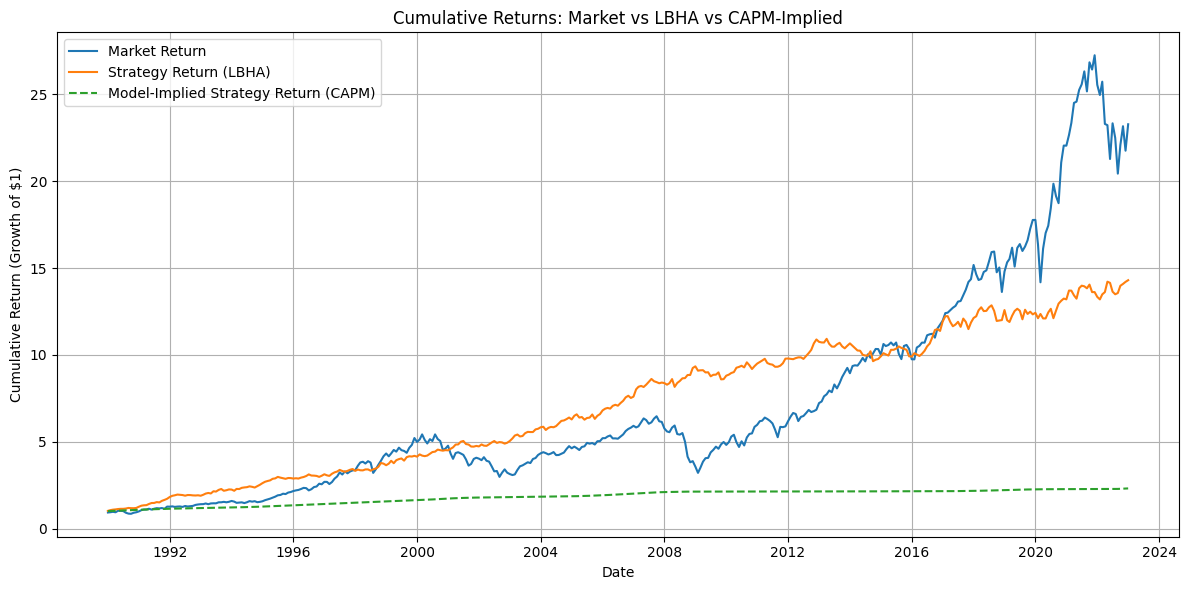

In [21]:
analyze_strategy("LBHA")

The LBHA strategy’s metrics indicate that it produces a substantial, statistically significant alpha while taking on essentially zero market exposure (beta ≈ 0.00). Its average monthly return is 0.6944 with a volatility of 2.1102, yielding a Sharpe ratio of 0.2303. From the CAPM regression, the alpha is 0.4828 (p < 0.001), implying that even after controlling for its negligible beta (0.0045), the strategy persists in generating excess returns. Because the beta is so close to zero, this performance appears largely uncorrelated with the broader market, suggesting that the LBHA strategy **beats the market** on a risk-adjusted basis.

## Part (b)

LSA Average Monthly Return: 0.9571
LSA Volatility: 3.1668
LSA Sharpe Ratio: 0.2364
LSA Alpha: 0.4794
LSA Beta: 0.3915
                            OLS Regression Results                            
Dep. Variable:                    LSA   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     171.7
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           8.09e-33
Time:                        23:00:45   Log-Likelihood:                -949.51
No. Observations:                 397   AIC:                             1903.
Df Residuals:                     395   BIC:                             1911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

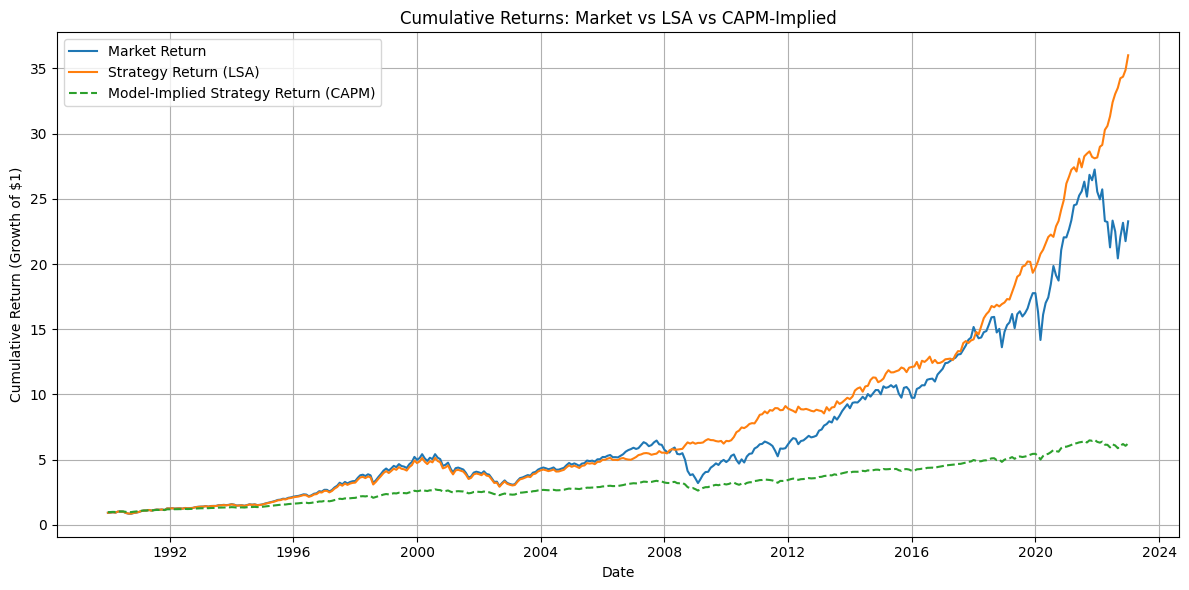

In [22]:
analyze_strategy("LSA")

The LSA strategy demonstrates a strong, statistically significant alpha of 0.4794, indicating that even after factoring in its moderate market exposure (beta ≈ 0.39), it manages to deliver excess returns. Its average monthly return of 0.9571 and Sharpe ratio of 0.2364 further support its positive performance profile. That said, the term “late start alpha” implies that the strategy might have a shorter or more recent track record, which can make clients skeptical about the durability of its alpha. One way to mitigate these concerns is to provide robust evidence; for example, out-of-sample tests, subperiod analysis, or a clear economic rationale showing why the alpha should persist. This helps ensure the strategy’s outperformance is not the result of an isolated market phase or mere data-mining.

## Part (c)

TA Average Monthly Return: 0.9612
TA Volatility: 3.4561
TA Sharpe Ratio: 0.2178
TA Alpha: 0.4036
TA Beta: 0.5078
                            OLS Regression Results                            
Dep. Variable:                     TA   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     296.8
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           5.28e-50
Time:                        23:02:10   Log-Likelihood:                -944.03
No. Observations:                 397   AIC:                             1892.
Df Residuals:                     395   BIC:                             1900.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

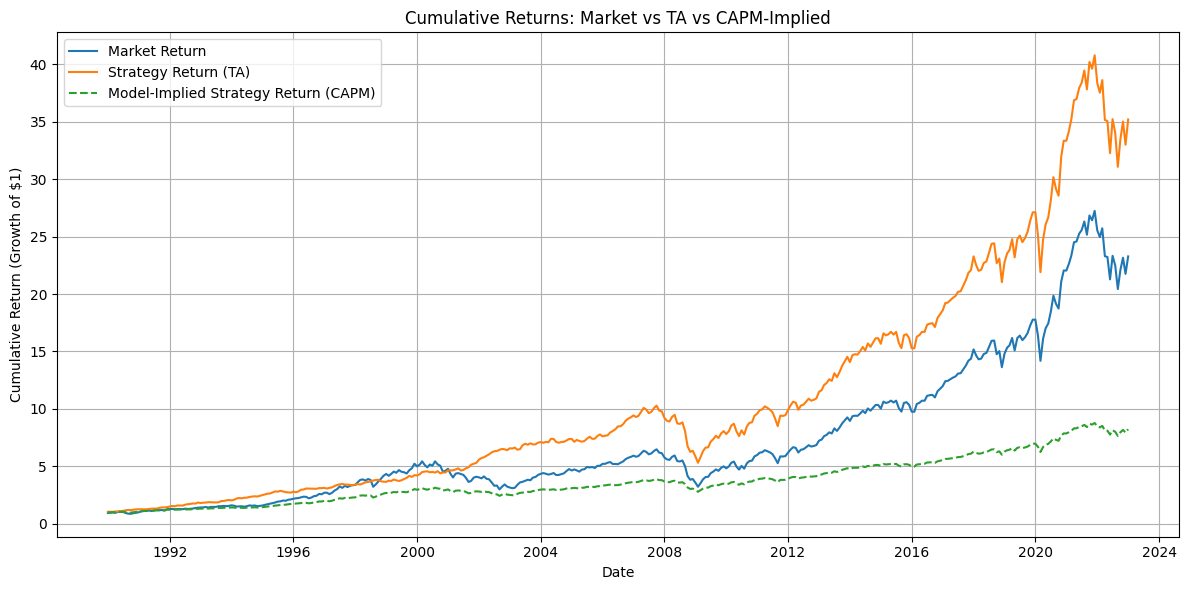

In [25]:
analyze_strategy("TA")

The TA strategy does indeed exhibit a positive and statistically significant alpha (0.4036 with a p-value well below 0.05), meaning it outperforms what its moderate market exposure (beta of about 0.51) would predict. Its monthly return of 0.9612 and Sharpe ratio of 0.2178 suggest a respectable performance profile, although the “tapering” label may indicate that this excess return could diminish over time. Investors will be interested in TA’s current outperformance but might require additional evidence (i.e. subperiod analysis or economic reasoning) to be confident that the alpha remains robust in the face of changing market conditions.

## Part (d)

HV Average Monthly Return: 0.9218
HV Volatility: 3.8352
HV Sharpe Ratio: 0.1860
HV Alpha: 0.1557
HV Beta: 0.8110
                            OLS Regression Results                            
Dep. Variable:                     HV   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     3163.
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          1.23e-190
Time:                        23:01:12   Log-Likelihood:                -660.20
No. Observations:                 397   AIC:                             1324.
Df Residuals:                     395   BIC:                             1332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

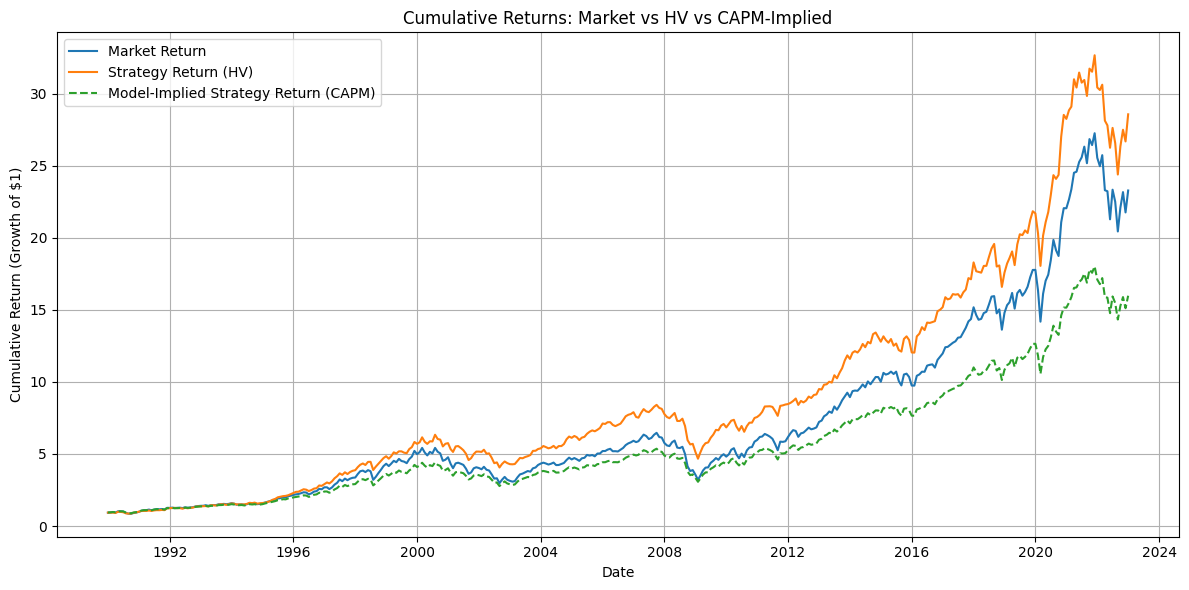

In [23]:
analyze_strategy("HV")

LV Average Monthly Return: 0.3067
LV Volatility: 0.2147
LV Sharpe Ratio: 0.4576
LV Alpha: 0.0987
LV Beta: -0.0006
                            OLS Regression Results                            
Dep. Variable:                     LV   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3484
Date:                Fri, 11 Apr 2025   Prob (F-statistic):              0.555
Time:                        23:01:19   Log-Likelihood:                 374.23
No. Observations:                 397   AIC:                            -744.5
Df Residuals:                     395   BIC:                            -736.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

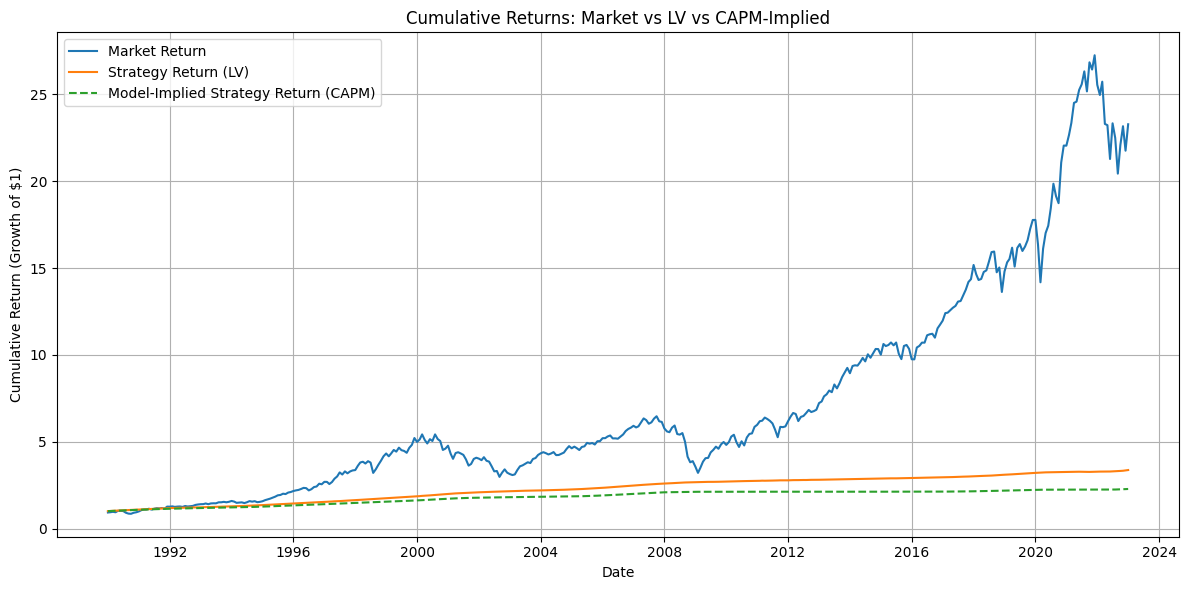

In [24]:
analyze_strategy("LV")

From a risk‐adjusted standpoint, the low-volatility (LV) strategy may be more appealing for clients who prioritize stability and smoother returns. Although LV offers more modest absolute returns (0.3067% per month) than the high-volatility (HV) strategy (0.9218%), it compensates by dramatically reducing risk (0.2147 volatility vs. 3.8352) and maintaining a higher Sharpe ratio (0.4576 vs. 0.1860). Its near‐zero beta (–0.0006) also means the LV strategy is largely uncorrelated with broad market movements, helping investors diversify away from market risk. So while HV may look attractive on a headline‐return basis, many clients seeking a calmer ride, better consistency, and stronger risk-adjusted performance will ultimately favor LV.

## Part (e)

NA Average Monthly Return: 0.1558
NA Volatility: 2.6908
NA Sharpe Ratio: -0.0196
NA Alpha: -0.4047
NA Beta: 0.5120
                            OLS Regression Results                            
Dep. Variable:                     NA   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     1002.
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          2.11e-110
Time:                        23:02:26   Log-Likelihood:                -705.75
No. Observations:                 397   AIC:                             1415.
Df Residuals:                     395   BIC:                             1423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

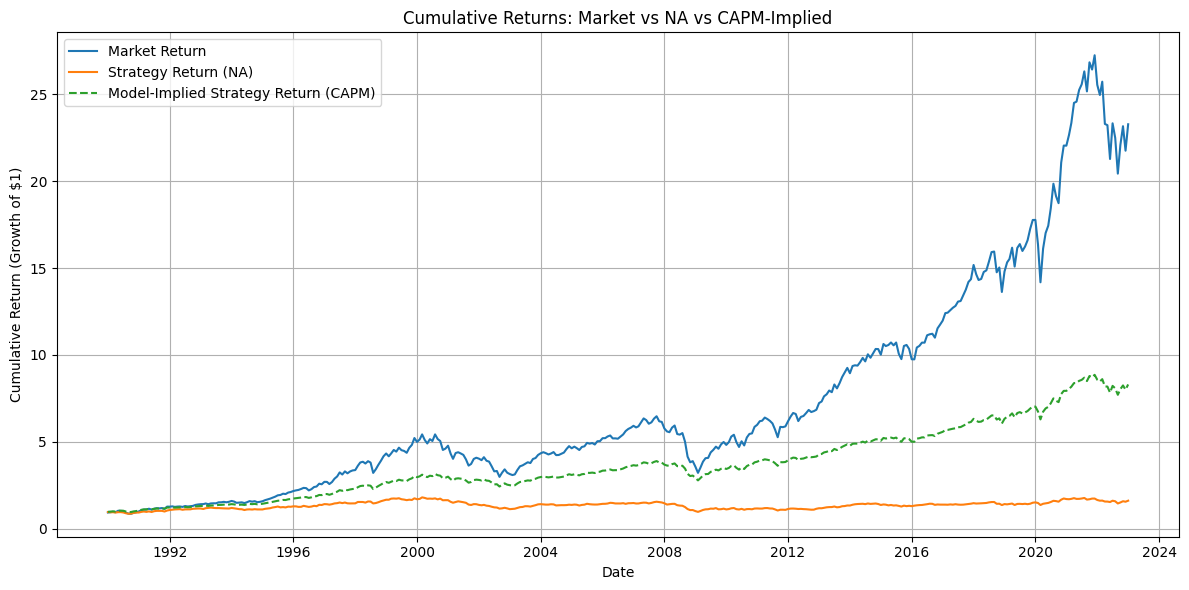

In [26]:
analyze_strategy("NA")

Although the “negative alpha” (NA) strategy clearly underperforms relative to its moderate market exposure—its alpha is -0.4047 and statistically significant—this does not necessarily render it useless. Some investors may find value in a reliably underperforming strategy by shorting it, effectively turning that negative alpha into a potential source of gains. Alternatively, NA might serve as a hedge if its returns are negatively correlated with other portfolio components, helping to reduce overall portfolio volatility. Therefore, **all this work wasn't for nothing**, as we can still use this strategy in a different way.

## Part (f)

LB Average Monthly Return: 0.6758
LB Volatility: 1.9407
LB Sharpe Ratio: 0.2408
LB Alpha: 0.4529
LB Beta: 0.0209
                            OLS Regression Results                            
Dep. Variable:                     LB   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9273
Date:                Fri, 11 Apr 2025   Prob (F-statistic):              0.336
Time:                        23:02:53   Log-Likelihood:                -822.72
No. Observations:                 397   AIC:                             1649.
Df Residuals:                     395   BIC:                             1657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

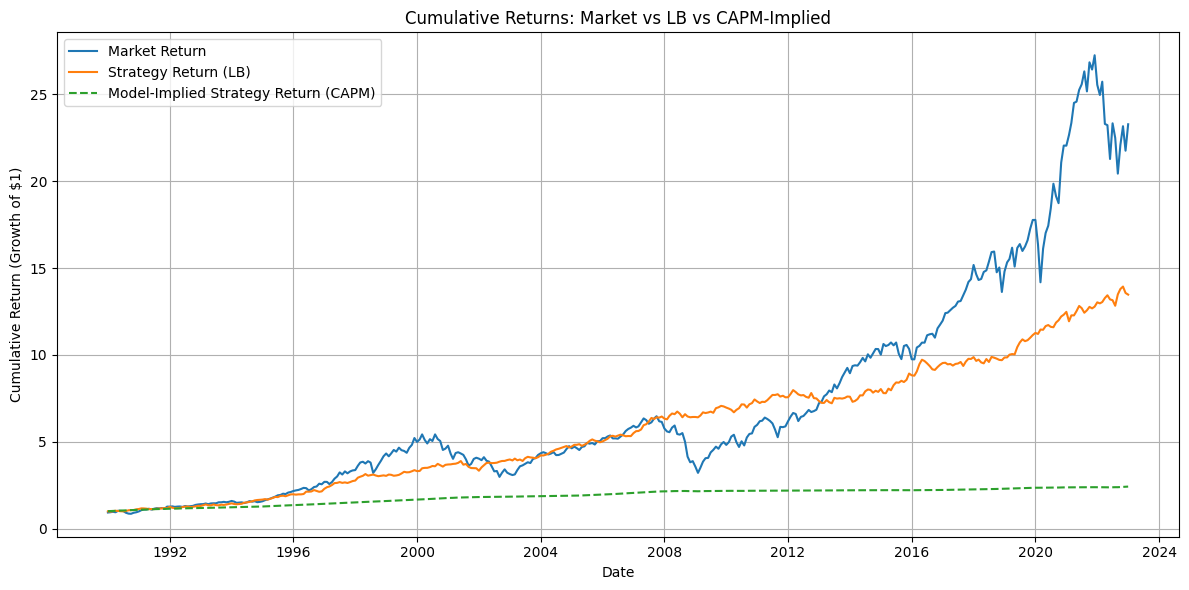

In [27]:
analyze_strategy("LB")

HB Average Monthly Return: 2.6418
HB Volatility: 13.3758
HB Sharpe Ratio: 0.1819
HB Alpha: 0.3722
HB Beta: 2.9978
                            OLS Regression Results                            
Dep. Variable:                     HB   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.593e+05
Date:                Fri, 11 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:03:01   Log-Likelihood:                -401.20
No. Observations:                 397   AIC:                             806.4
Df Residuals:                     395   BIC:                             814.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

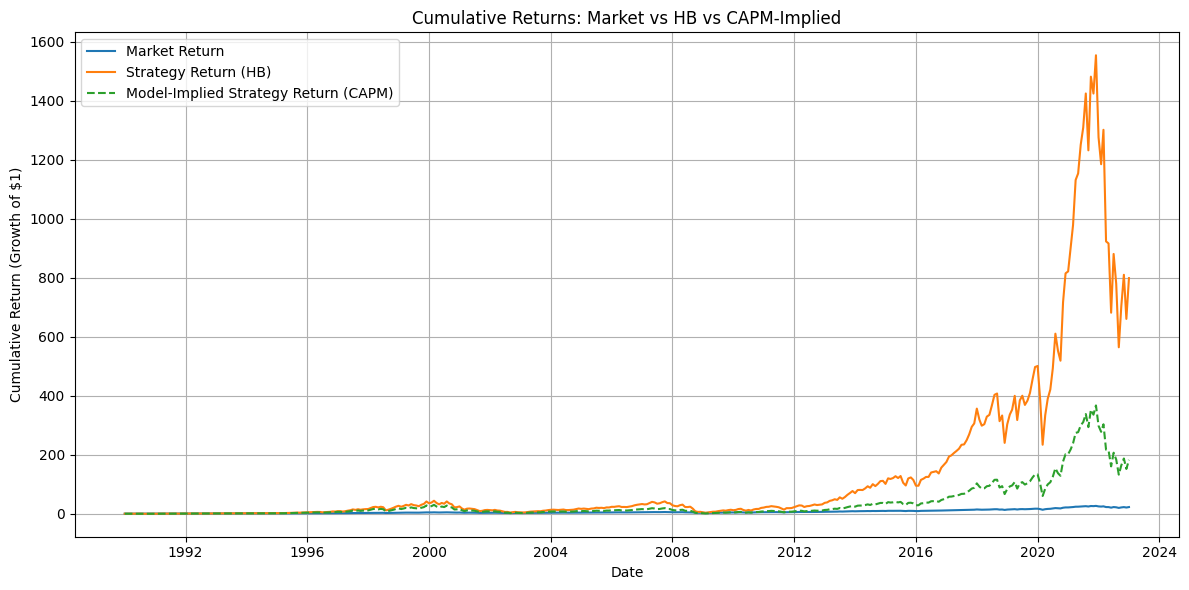

In [28]:
analyze_strategy("HB")

From a risk-adjusted perspective, the low-beta (LB) strategy is more attractive because it delivers a higher Sharpe ratio (0.24 vs. 0.18) while also posting a larger alpha (0.45 vs. 0.37) despite having virtually no exposure to the market (beta ≈ 0.02). The LB strategy’s lower volatility (1.94 vs. 13.38) means investors can expect more consistent performance without relying heavily on broad market swings, making it an excellent choice for those who prioritize stable returns. Essentially, LB captures meaningful excess returns without imposing the significant drawdown risk and emotional stress typically associated with the far more volatile high-beta (HB) approach.

# Problem 3

## Part (a)

- LB Alpha: 0.4529
- LB Beta: 0.0209
- HB Alpha: 0.3722
- HB Beta: 2.9978

These values were calculated in **part 2(f)** using CAPM regression on the before-fee strategy returns.

## Part (b)

In [ ]:
def compute_after_fee_returns_total(strategy):
    """
    Computes the monthly after-fee returns for a hedge fund strategy using 
    total returns.

    Fees are applied as follows:
      - A fixed management fee of 1.8% per annum (0.15% per month) is deducted 
        at the start of each month.
      - An incentive fee of 20% is taken on any gains (on the total return 
        basis) above the previous maximum cumulative value, charged at the end 
        of the month.

    The total return for each month is given by:
        total_return = strategy_return + RF
    where merged['RF'] is the risk-free rate for that month.

    Parameters:
    -----------
    strategy : str
        The name of the strategy column in merged (e.g. 'LB' or 'HB').

    Returns:
    --------
    np.ndarray
        An array of monthly after-fee returns (in percentage) for the given 
        strategy. Also, adds a column '{strategy}_after_fee' to the global 
        merged DataFrame.
    """
    n = len(merged)
    after_fee_returns = []
    cumulative_value = 1.0  # Starting with $1 invested
    max_value = 1.0         # Initial high-water mark

    for i in range(n):
        prev_value = cumulative_value
        
        # 1. Deduct the monthly management fee (0.15% of current value)
        cumulative_value *= (1 - 0.0015)
        
        # 2. Calculate total monthly return (strategy return + risk-free rate)
        #    Note: Both strategy and RF are in percentage.
        total_return_pct = merged[strategy].iloc[i] + merged['RF'].iloc[i]
        cumulative_value *= (1 + total_return_pct / 100.0)
        
        # 3. Deduct incentive fee: 20% on gains above the current maximum value
        incentive_fee = 0.20 * max(0, cumulative_value - max_value)
        cumulative_value -= incentive_fee
        
        # 4. Update the running maximum value
        max_value = max(max_value, cumulative_value)
        
        # 5. Record the after-fee monthly return (percentage change relative to 
        #    prev_value)
        month_return_pct = (cumulative_value / prev_value - 1) * 100
        after_fee_returns.append(month_return_pct)
    
    # Save the after-fee returns into the merged DataFrame for later analysis
    merged[f'{strategy}_after_fee'] = after_fee_returns
    return np.array(after_fee_returns)

In [53]:
def run_capm_on_after_fee(strategy):
    """
    Runs a CAPM regression on the after-fee returns for a given strategy.
    
    The regression is applied on the excess returns, calculated as:
         after_fee_return - RF
    where RF is taken from the merged DataFrame.
    
    Parameters:
    -----------
    strategy : str
        The name of the strategy column (e.g., 'LB' or 'HB').
    
    Returns:
    --------
    model : statsmodels.regression.linear_model.RegressionResultsWrapper
        The fitted CAPM regression model.
    """
    # Create a Series for the after-fee returns
    returns_series = pd.Series(merged[f'{strategy}_after_fee'])
    
    # Calculate excess returns by subtracting the risk-free rate for each month.
    # Note: Both after-fee returns and RF are in percentage.
    excess_returns = returns_series - merged['RF']
    
    # Set up CAPM regression: excess return = alpha + beta * (Mkt-RF)
    X = sm.add_constant(merged['Mkt-RF'])
    model = sm.OLS(excess_returns, X).fit()
    
    alpha = model.params['const']
    beta = model.params['Mkt-RF']
    print(f"After-fee CAPM for {strategy}:")
    print(f"  Alpha: {alpha:.4f}")
    print(f"  Beta: {beta:.4f}")
    print(model.summary())
    
    return model

In [51]:
lb_after_fee = compute_after_fee_returns_total('LB')
hb_after_fee = compute_after_fee_returns_total('HB')

In [ ]:
# Run CAPM on after-fee returns (excess returns)
lb_model = run_capm_on_after_fee('LB')

After-fee CAPM for LB:
  Alpha: 0.1997
  Beta: 0.0177
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7554
Date:                Fri, 11 Apr 2025   Prob (F-statistic):              0.385
Time:                        23:32:10   Log-Likelihood:                -797.51
No. Observations:                 397   AIC:                             1599.
Df Residuals:                     395   BIC:                             1607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [55]:
hb_model = run_capm_on_after_fee('HB')

After-fee CAPM for HB:
  Alpha: -0.0985
  Beta: 2.9255
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.319e+04
Date:                Fri, 11 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:31:49   Log-Likelihood:                -575.10
No. Observations:                 397   AIC:                             1154.
Df Residuals:                     395   BIC:                             1162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

## Part (c)

In [ ]:
def compute_total_fees(strategy, initial_capital=100e6):
    """
    Simulates the fee structure for a hedge fund strategy using total returns.
    
    For each month, the following steps are executed:
      1. Deduct a management fee of 0.15% of the current portfolio value.
      2. Apply the total return for the month (strategy return + risk-free rate)
         where both are expressed in percentages.
      3. Deduct an incentive fee of 20% on the gains above the previous 
         high-water mark.
      4. Track cumulative fees paid.
    
    Parameters:
    -----------
    strategy : str
        The column name (e.g., 'LB' or 'HB') corresponding to the strategy's 
        returns (before fees) in the merged DataFrame.
    initial_capital : float, optional
        The starting amount invested (default is \$100,000,000).
    
    Returns:
    --------
    total_fees : float
        The total fees paid over the period.
    final_capital : float
        The final portfolio value after all fees.
    """
    n = len(merged)
    
    # Starting portfolio value and the high-water mark (max portfolio value)
    capital = initial_capital
    max_value = capital
    total_fees = 0.0
    
    # Loop over each month in the merged DataFrame
    for i in range(n):
        # Store portfolio value before fees for computing monthly return later
        prev_capital = capital
        
        # 1. Deduct the management fee (0.15% per month)
        mgmt_fee = capital * 0.0015
        total_fees += mgmt_fee
        capital -= mgmt_fee
        
        # 2. Apply monthly total return (strategy + risk-free rate)
        # Note: Both merged[strategy] and merged['RF'] are in percentage.
        total_return_pct = merged[strategy].iloc[i] + merged['RF'].iloc[i]
        capital *= (1 + total_return_pct / 100.0)
        
        # 3. Calculate the incentive fee if the new capital exceeds previous max
        incentive_fee = 0.20 * max(0, capital - max_value)
        total_fees += incentive_fee
        capital -= incentive_fee
        
        # 4. Update the high-water mark
        max_value = max(max_value, capital)
        
    return total_fees, capital

In [58]:
lb_total_fees, lb_final_capital = compute_total_fees('LB')
hb_total_fees, hb_final_capital = compute_total_fees('HB')

print("After fees:")
print("LB Strategy:")
print(f"  Total Fees Paid: ${lb_total_fees:,.2f}")
print(f"  Final Portfolio Value: ${lb_final_capital:,.2f}")
print()

print("HB Strategy:")
print(f"  Total Fees Paid: ${hb_total_fees:,.2f}")
print(f"  Final Portfolio Value: ${hb_final_capital:,.2f}")

After fees:
LB Strategy:
  Total Fees Paid: $276,347,902.30
  Final Portfolio Value: $495,428,916.08

HB Strategy:
  Total Fees Paid: $7,504,422,178.42
  Final Portfolio Value: $11,995,800,640.36


The **HB strategy** has much higher fees. This strategy has higher absolute return. Fees are based on profit, not strictly alpha. Thus, even though the strategies have similar alpha this strategy has much higher fees. Additionally, the HB strategy's high beta leads to very large gains in bull markets.

## Part (d)

High-beta funds generate larger absolute returns in bull markets which directly increases both management and incentive fees under the given fee structure. Even if the alpha is small, the shear scale of nominal gains drives fee revenue which grows exponeitally in a prolonged bull market. Many top-performing funds lean into beta because it scales more predictably and is easier to monetize than hard-to-source alpha. This incentive structure rewards exposure over skill, so high-beta strategies thrive even when they are in parity with the market.